<a href="https://colab.research.google.com/github/YanjunLin-Andrie/FanaticFi_top15_college_data/blob/main/FF_top15_college_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
from pathlib import Path

### Data referrence:

* Data credit to `T-Rank Era Player Finder` by Bart Torvik. Click [here](https://barttorvik.com/) for more information

* Bart Torvik's [blog](http://adamcwisports.blogspot.com/p/data.html) provides information on how to scrape data from his website.

* I followed guidance from `College Basketball 2009-2021 + NBA Advanced Stats` by Aditya Jumar. Click [here](https://www.kaggle.com/datasets/adityak2003/college-basketball-players-20092021) for more information

* 2022 Draft Data were collected from nba.com, click [here](https://www.nba.com/stats/draft/history/) for more information

In [2]:
# Load data and fill blank cells with 0
df_all = pd.read_csv(Path('2009-2022.csv'), low_memory = False)
df_all = df_all.fillna(0)
# Create a column to hold Group data
df_all.loc[:,'Group'] = 0
df_all

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65,Group
0,A.D. Vassallo,Virginia Tech,ACC,34,89.8,111.8,25.0,53.0,56.50,4.4,...,1.3824,4.8235,6.2059,2.5882,0.8235,0.8529,19.0588,0,10.674900,0
1,A.J. Abrams,Texas,B12,35,93.5,116.0,19.0,50.7,54.32,1.2,...,0.4000,1.8286,2.2286,1.3143,1.3429,0.1143,16.5714,0,11.797500,0
2,A.J. Davis,Wyoming,MWC,28,26.7,80.1,15.2,42.3,44.60,3.0,...,0.2857,1.9286,2.2143,0.5357,0.3571,0.0714,2.4643,0,3.407200,0
3,A.J. Gasporra,UTSA,Slnd,13,6.6,91.1,15.6,71.9,71.88,1.4,...,0.0769,0.1538,0.2308,0.2308,0.0769,0.0000,1.7692,0,8.791720,0
4,A.J. Hardeman,New Mexico,MWC,33,21.5,84.2,16.6,52.4,48.49,8.0,...,0.5758,1.5455,2.1212,0.0909,0.2424,0.4848,2.2424,0,0.400413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66068,Zion Young,Oakland,Horz,7,6.6,105.3,21.0,50.0,53.08,1.5,...,0.1429,1.2857,1.4286,0.1429,0.1429,0.1429,5.2857,Stretch 4,19.847300,0
66069,Zoar Nedd,Hawaii,BW,19,12.1,83.9,16.3,36.8,39.00,3.0,...,0.1429,0.8095,0.9524,0.2857,0.2381,0.0000,1.8095,Wing G,14.099300,0
66070,Zool Kueth,Northern Illinois,MAC,30,38.3,92.0,15.2,40.1,46.62,4.7,...,0.6333,1.1667,1.8000,0.2333,0.3333,0.4667,3.7667,Stretch 4,10.106600,0
66071,Zurabi Zhgenti,Northwestern St.,Slnd,28,30.7,79.6,19.6,40.7,47.31,6.3,...,0.8710,2.0000,2.8710,0.6129,0.2581,0.0968,3.8710,Stretch 4,5.054760,0


---
## Find top 15
### Binary Classification

In [4]:
# Create groups based on ranks
for index, row in df_all.iterrows():
    if row['pick'] <= 15 and row['pick'] > 0:
        df_all.at[index,'Group'] = 1
    else:
        df_all.at[index,'Group'] = 0
    
df_all

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65,Group
0,A.D. Vassallo,Virginia Tech,ACC,34,89.8,111.8,25.0,53.0,56.50,4.4,...,1.3824,4.8235,6.2059,2.5882,0.8235,0.8529,19.0588,0,10.674900,0
1,A.J. Abrams,Texas,B12,35,93.5,116.0,19.0,50.7,54.32,1.2,...,0.4000,1.8286,2.2286,1.3143,1.3429,0.1143,16.5714,0,11.797500,0
2,A.J. Davis,Wyoming,MWC,28,26.7,80.1,15.2,42.3,44.60,3.0,...,0.2857,1.9286,2.2143,0.5357,0.3571,0.0714,2.4643,0,3.407200,0
3,A.J. Gasporra,UTSA,Slnd,13,6.6,91.1,15.6,71.9,71.88,1.4,...,0.0769,0.1538,0.2308,0.2308,0.0769,0.0000,1.7692,0,8.791720,0
4,A.J. Hardeman,New Mexico,MWC,33,21.5,84.2,16.6,52.4,48.49,8.0,...,0.5758,1.5455,2.1212,0.0909,0.2424,0.4848,2.2424,0,0.400413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66068,Zion Young,Oakland,Horz,7,6.6,105.3,21.0,50.0,53.08,1.5,...,0.1429,1.2857,1.4286,0.1429,0.1429,0.1429,5.2857,Stretch 4,19.847300,0
66069,Zoar Nedd,Hawaii,BW,19,12.1,83.9,16.3,36.8,39.00,3.0,...,0.1429,0.8095,0.9524,0.2857,0.2381,0.0000,1.8095,Wing G,14.099300,0
66070,Zool Kueth,Northern Illinois,MAC,30,38.3,92.0,15.2,40.1,46.62,4.7,...,0.6333,1.1667,1.8000,0.2333,0.3333,0.4667,3.7667,Stretch 4,10.106600,0
66071,Zurabi Zhgenti,Northwestern St.,Slnd,28,30.7,79.6,19.6,40.7,47.31,6.3,...,0.8710,2.0000,2.8710,0.6129,0.2581,0.0968,3.8710,Stretch 4,5.054760,0


In [5]:
# Select from the following to be X
df_all.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65', 'Group'],
      dtype='object')

In [6]:
# Creates X by using specific statistics
features = ['GP','Min_per', 'Ortg','eFG','TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'blk_per','stl_per', 'ftr', 'pts', 'twoP_per', 'TP_per','dporpag', 'porpag', 'TO_per', 'FT_per']

In [8]:
# Build model with 2009-2021 data
model_df = df_all.loc[df_all['year'] < 2022]

# 2022 data will be used as test data
test_df = df_all.loc[df_all['year'] == 2022]

In [12]:
# Set Feature and Target for model_df
X = model_df[features]
y = model_df['Group']

In [13]:
# Review Grouped data size
y.value_counts()

0    60769
1      292
Name: Group, dtype: int64

In [14]:
# Set Feature and Target for test_df
X_2022 = test_df[features]
y_2022 = test_df['Group']
y_2022.value_counts()

0    5000
1      12
Name: Group, dtype: int64

### The data is very imballanced and `Under Sampling` procedures are taken to revise the dataset to train ML models

## Under sampling

Referrence:

`Undersampling Algoriths for Imbalanced Classification` by Jason Brownlee PhD 

Click [here](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/) for more information

In [15]:
# Import imbalanced-learn
import imblearn
print(imblearn.__version__)

0.8.1


###Methods that select examples to KEEP
---
####1. Near Miss Undersampling
NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.

NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.

NearMiss-3: Majority class examples with minimum distance to each minority class example.

In [16]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 292, 1: 292})


### Performace repport:
*   NM1 best performing model: SVC .82 accuracy, class 1 F1 score .81
*   NM2 best performing model: AdaBoost .99 accuracy, class 1 F1 score .99
*   NM3 best performing model: SVC .79 accuracy, class 1 F1 score .80

---
###Methods that select examples to KEEP
####2. Condensed Nearest Neighbor Rule Underssampling
Seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.

It’s a relatively slow procedure, so small datasets and small k values are preferred.

In [287]:
# # Import method library
# from imblearn.under_sampling import CondensedNearestNeighbour
# from collections import Counter
# # define the undersampling method
# undersample = CondensedNearestNeighbour(n_neighbors=1)
# # transform the dataset
# X, y = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

### Performace repport:
*   CNN best performing model: DNN with .86 accuracy, class 1 F1 score .47

---
###Methods that select examples to DELETE
####Tomek Links for Undersampling
A criticism of the Condensed Nearest Neighbor Rule is that examples are selected randomly, especially initially.

Tomek Links finds pairs of examples, one from each class; they together have the smallest Euclidean distance to each other in feature space. These cross-class pairs are now generally referred to as “Tomek Links” and are valuable as they define the class boundary.

In [288]:
# # Import method library
# from imblearn.under_sampling import TomekLinks
# from collections import Counter
# # define the undersampling method
# undersample = TomekLinks()
# # transform the dataset
# X, y = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

### Performace repport:
*   Tomek Links best performing model: DNN with 1.0 accuracy and class 1 F1 score .23 

---
###Combinations of KEEP and DELETE methods
####1. One-Sided Selection for Undersampling
One-Sided Selection, or OSS for short, is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule.

In [289]:
# # Import method library
# from imblearn.under_sampling import OneSidedSelection
# from collections import Counter
# # define the undersampling method
# undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# # transform the dataset
# X, y = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

### Performace repport:
*   OSS best performing model: AdaBoost with .98 accuracy and class 1 F1 score .25 

---
###Combinations of KEEP and DELETE methods
####2. Neighborhood Cleaning Rule for Undersampling
The Neighborhood Cleaning Rule, or NCR for short, is an undersampling technique that combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples and the Edited Nearest Neighbors (ENN) Rule to remove noisy or ambiguous examples.

In [290]:
# # Import method library
# from imblearn.under_sampling import NeighbourhoodCleaningRule
# from collections import Counter
# # define the undersampling method
# undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# # transform the dataset
# X, y = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

### Performace repport:
*   NCR best performing model: AdaBoost with 1.0 accuracy and class 1 F1 score .16

---
##The best undersampling method for FanaticFi Top15 data is: **NearMiss Version 2**
##The best ML model under that undersampling method is: **AdaBoost** `accuracy` .99 and class 1 `F1` score .99

---
##Split and Scale data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split dataset into train, test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [21]:
# Initiate the scaler
X_scaler = StandardScaler()

# Fit the scaler to the features dataset
X_scaler = X_scaler.fit(X)

In [22]:
# Scale train, test datasets
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
# Scale 2022 data
X_2022_scaled = X_scaler.transform(X_2022)

---
## Using LazyPredict


In [23]:
# Install LazyPRedict
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# After installation, restart Runtime and proceed to the next cell

In [24]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
# Train the new datasets
lc = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
lc_predictions = lc.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Print the model
print(lc_predictions)

100%|██████████| 29/29 [00:03<00:00,  8.51it/s]

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.98               0.98     0.98      0.98   
QuadraticDiscriminantAnalysis      0.98               0.98     0.98      0.98   
LGBMClassifier                     0.97               0.97     0.97      0.97   
ExtraTreesClassifier               0.97               0.97     0.97      0.97   
XGBClassifier                      0.97               0.97     0.97      0.97   
NuSVC                              0.97               0.97     0.97      0.97   
RandomForestClassifier             0.96               0.96     0.96      0.96   
GaussianNB                         0.96               0.96     0.96      0.96   
AdaBoostClassifier                 0.95               0.95     0.95      0.95   
KNeighborsClassifier               0.95               0.95     0.95      0.95   
DecisionTreeClassifier     

---
##The best ML model under **NearMiss Version 2** undersampling method is: **SVC** `accuracy` .98 and class 1 `F1` score .98

In [26]:
# Import machine learning dependencies
import tensorflow as tf
from sklearn import svm
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

## Machine Learning with preprocessed data


*   Support Vector Classifier (SVC)
*   Deceision Tree
*   Logistic Regression
*   AdaBoost
*   Deep Neural Network

---
## Use the SVC classifier model

In [46]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.97      0.98        79

    accuracy                           0.98       146
   macro avg       0.98      0.98      0.98       146
weighted avg       0.98      0.98      0.98       146



---
## Use Ddceision Tree

In [29]:
# Import decision tree classifier from SKLearn
from sklearn import tree

# Initiate the model instance
dtc = tree.DecisionTreeClassifier()

# Fit the model using the training data
dtc_model = dtc.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
dtc_pred = dtc_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
dtc_testing_report = classification_report(y_test, dtc_pred)

# Print the classification report
print(dtc_testing_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.94      0.95      0.94        79

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146



---
## Use Logistic Regression

In [30]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
lr = LogisticRegression()

# Fit the model using the training data
lr_model = lr.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
lr_pred = lr_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(y_test, dtc_pred)

# Print the classification report
print(lr_testing_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.94      0.95      0.94        79

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146



---
## Use AdaBoost

In [31]:
# Import AdaBoost classifier from SKLearn
from sklearn.ensemble import AdaBoostClassifier

# Initiate the model instance
abc = AdaBoostClassifier()

# Fit the model using the training data
abc_model = abc.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
abc_pred = abc_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
abc_testing_report = classification_report(y_test, abc_pred)

# Print the classification report
print(abc_testing_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.97      0.94      0.95        79

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146



##Save the best performing model

In [49]:
# import pickle
# # save the model
# AdaBoostClassifier = open("abc.pkl","wb")
# pickle.dump(abc_model,AdaBoostClassifier) 
# AdaBoostClassifier.close() 

---
## Use Deep Neural Network

In [32]:
# Define number of nodes on each layer
input_features = 18
layer1 = 40
layer2 = 30
layer3 = 10

# Initiate the model
nn = Sequential()

In [33]:
# Add all layers to the model
nn.add(Dense(
    units = layer1, 
    input_dim = input_features, 
    activation = 'relu'
))

nn.add(Dense(
    units = layer2, 
    activation = 'relu'
))

nn.add(Dense(
    units = layer3, 
    activation = 'relu'
))

# Add output layer
nn.add(Dense(units=1, activation = 'sigmoid'))

In [34]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [35]:
# Fit the model
deep_net_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.2448 - accuracy: 0.6096
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.8858
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9178
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9361
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9429
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 0.9452
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9429
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9452
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9498
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9566
Epoch 11/

In [36]:
# Print loss and accuracy score of training set
loss, accuracy = nn.evaluate(X_train_scaled, y_train, verbose=2)

14/14 - 0s - loss: 0.0047 - accuracy: 0.9954 - 158ms/epoch - 11ms/step


In [37]:
# Print loss and accuracy score of testing set
val_loss, val_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

5/5 - 0s - loss: 0.0466 - accuracy: 0.9315 - 22ms/epoch - 4ms/step


In [38]:
X_test_scaled

array([[-1.75464895, -0.87382549,  0.18072535, ..., -0.43260519,
         0.47497886,  0.7425042 ],
       [ 1.61745513,  1.32136467,  2.55290602, ...,  1.88541156,
        -1.72228848,  1.3597462 ],
       [ 1.48257096,  0.94162798,  0.09468771, ...,  0.47068398,
         0.03552539,  0.31441702],
       ...,
       [-0.67557565, -0.72297119,  0.34050954, ...,  0.34670288,
        -0.82025241, -0.6910901 ],
       [ 0.80815015,  0.78036993,  1.88918708, ...,  2.04039091,
        -1.42160979,  1.26019104],
       [ 0.53838182,  1.49302645,  0.3896739 , ...,  1.01923456,
         0.01239626,  1.28010207]])

In [39]:
y_test

0      0
514    1
355    1
23     0
385    1
      ..
411    1
160    0
19     0
318    1
306    1
Name: Group, Length: 146, dtype: int64

In [40]:
deep_net_pred = nn.predict(X_test_scaled)
deep_net_pred[:10]

array([[3.3038855e-04],
       [1.0000000e+00],
       [9.9999464e-01],
       [5.6770444e-04],
       [9.9962521e-01],
       [1.8593669e-04],
       [1.0135749e-01],
       [3.6808848e-04],
       [2.1389127e-04],
       [4.7243237e-03]], dtype=float32)

In [41]:
import numpy as np
deep_net_pred = np.where(deep_net_pred > .5, 1, 0)


In [42]:
# deep_net_pred = nn.predict(X_test_scaled)
from itertools import chain
pred = list(chain(*deep_net_pred))
import numpy as np
array = np.asarray(pred)
array[:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [43]:
deep_net_classification_report = classification_report(y_test, array)

# Print the classification report
print(deep_net_classification_report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        67
           1       0.99      0.89      0.93        79

    accuracy                           0.93       146
   macro avg       0.93      0.94      0.93       146
weighted avg       0.94      0.93      0.93       146



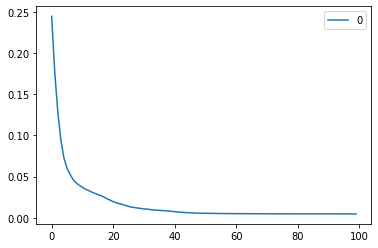

In [44]:
# Plot the loss rate
loss_df = pd.DataFrame(deep_net_model.history['loss'])
loss_df.plot()

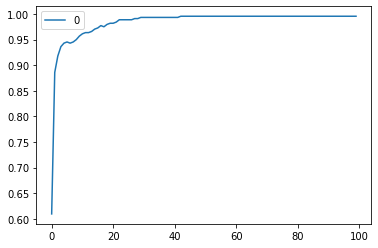

In [45]:
# Plot the accuracy score
accuracy_df = pd.DataFrame(deep_net_model.history['accuracy'])
accuracy_df.plot()

---
## Test model with 2022 data